## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


## Load the dataset

In [2]:
df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')  # Replace with your filename
df.head()


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


## Data Exploration

In [3]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())


Shape of dataset: (200000, 24)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_

## Data Processing

In [4]:
#dropping unnecessary columns
columns_to_drop = ['Customer_ID', 'Customer_Name', 'Merchant_ID', 'Customer_Contact', 'Customer_Email','Transaction_ID']
df = df.drop(columns=columns_to_drop)

In [5]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())

Shape of dataset: (200000, 18)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   200000 non-null  object 
 1   Age                      200000 non-null  int64  
 2   State                    200000 non-null  object 
 3   City                     200000 non-null  object 
 4   Bank_Branch              200000 non-null  object 
 5   Account_Type             200000 non-null  object 
 6   Transaction_Date         200000 non-null  object 
 7   Transaction_Time         200000 non-null  object 
 8   Transaction_Amount       200000 non-null  float64
 9   Transaction_Type         200000 non-null  object 
 10  Merchant_Category        200000 non-null  object 
 11  Account_Balance          200000 non-null  float64
 12  Transaction_Device       200000 non-null  object 
 13  Transaction_


Missing values in each column:

Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Transaction_Description    0
dtype: int64


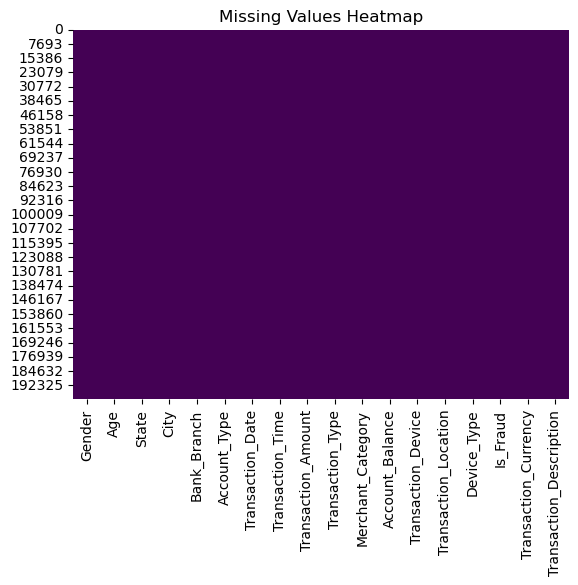

In [53]:
# Checking for Missing Values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


## Feature Engineering

In [49]:
#Encode Categorical Variables
label_encoder = LabelEncoder()
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

## Training Process

In [8]:
#Define Features and Target
X = df.drop(columns=['Is_Fraud'])
y = df['Is_Fraud']


In [55]:
#Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

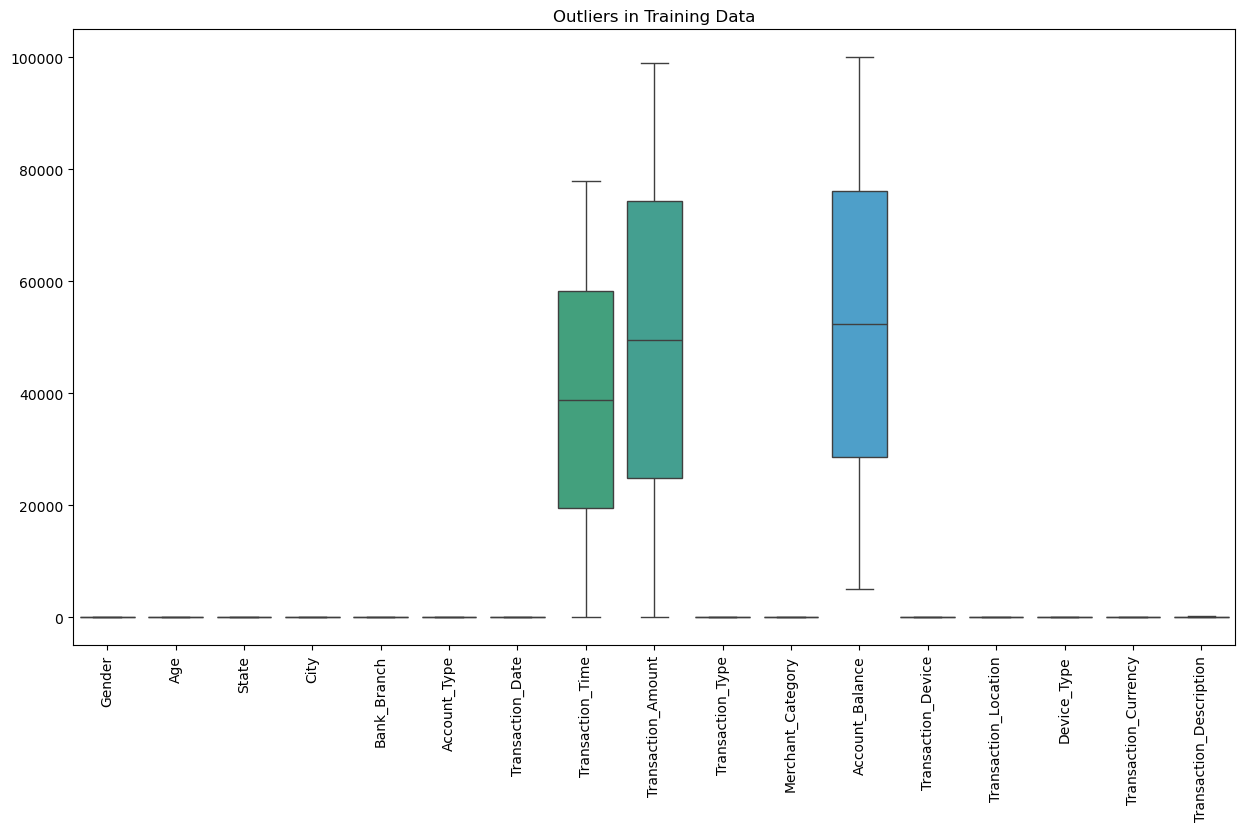

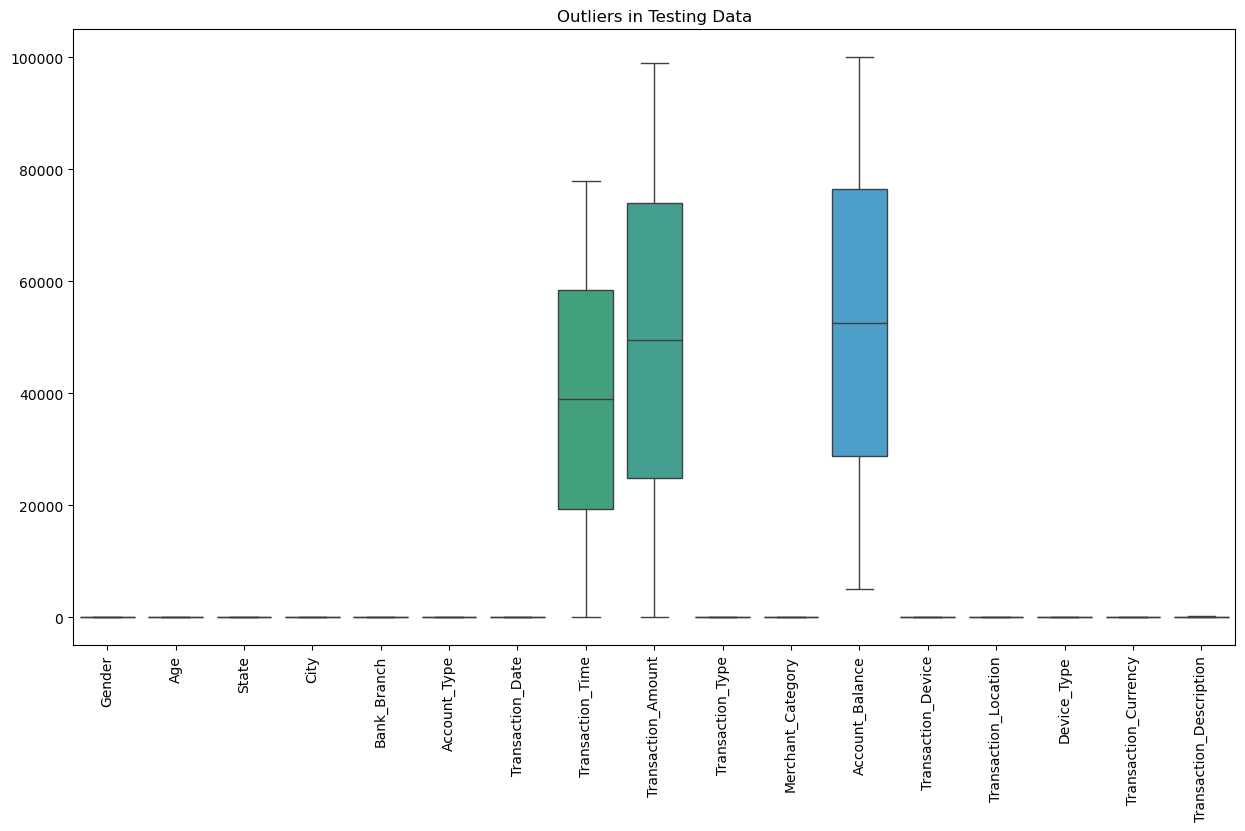

In [37]:
#Detecting Outliers on Train and Test Separately

# Boxplot on train data
plt.figure(figsize=(15,8))
sns.boxplot(data=pd.DataFrame(x_train))
plt.title('Outliers in Training Data')
plt.xticks(rotation=90)
plt.show()

# Boxplot on test data
plt.figure(figsize=(15,8))
sns.boxplot(data=pd.DataFrame(x_test))
plt.title('Outliers in Testing Data')
plt.xticks(rotation=90)
plt.show()


## Checking and Handling Imbalanced data

In [12]:
#checking for imbalance data
df['Is_Fraud'].value_counts()

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

In [13]:
#Handle Imbalance using SMOTE
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

print("Class distribution after SMOTE:\n")
print(y_train_smote.value_counts())

Class distribution after SMOTE:

Is_Fraud
0    151930
1    151930
Name: count, dtype: int64


## Feature Scaling

In [ ]:
#Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

## Train Models

In [15]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train all models
for name, model in models.items():
    model.fit(x_train_scaled, y_train_smote)


## Predictions and Evaluation

In [16]:
# Create leaderboard
leaderboard = []

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    leaderboard.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4)
    })
    
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



=== Logistic Regression ===
Confusion Matrix:
 [[24765 13217]
 [ 1260   758]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     37982
           1       0.05      0.38      0.09      2018

    accuracy                           0.64     40000
   macro avg       0.50      0.51      0.43     40000
weighted avg       0.91      0.64      0.74     40000


=== Random Forest ===
Confusion Matrix:
 [[34569  3413]
 [ 1830   188]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     37982
           1       0.05      0.09      0.07      2018

    accuracy                           0.87     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.87      0.89     40000


=== AdaBoost ===
Confusion Matrix:
 [[27621 10361]
 [ 1449   569]]

Classification Report:
               precision    recall  f1-score   suppo

In [17]:
# Step 14: Display Leaderboard

leaderboard_df = pd.DataFrame(leaderboard)
leaderboard_df = leaderboard_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print("\n\n=== Model Performance Leaderboard ===\n")
print(leaderboard_df)




=== Model Performance Leaderboard ===

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.6381     0.0542  0.3756    0.0948
1                  KNN    0.6403     0.0536  0.3682    0.0936
2             AdaBoost    0.7047     0.0521  0.2820    0.0879
3        Random Forest    0.8689     0.0522  0.0932    0.0669


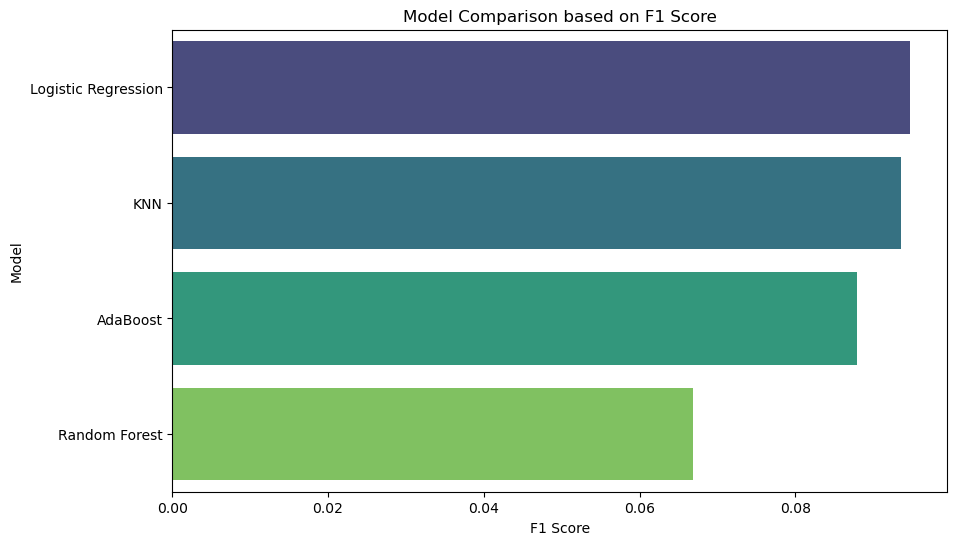

In [18]:
# Step 15: Visualize Performance

plt.figure(figsize=(10,6))
sns.barplot(x='F1 Score', y='Model', data=leaderboard_df, palette='viridis')
plt.title('Model Comparison based on F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()
